In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl
%matplotlib inline

In [26]:
PATH = "Data"
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(PATH) for f in filenames if os.path.splitext(f)[1] == '.txt']
# Create pairs of consecutive files
file_pairs = [(all_files[i], all_files[i + 1]) for i in range(0,len(all_files) - 1, 2)]


In [29]:
import numpy as np


def getSteps(file_pair, window_size=20, threshold=0.1):
    meter = pd.read_csv(file_pair[0], sep=' ')
    expected = pd.read_csv(file_pair[1], sep=' ').iloc[:, 0]
    data1 = meter.iloc[:, 3] ** 2 + meter.iloc[:, 4] ** 2 + meter.iloc[:, 5] ** 2
    accelerometer = data1.apply(lambda x: x ** 0.5)
    # data1 = msl.apply_filter(accelerometer, [-0.00614041469794508,	-0.0135816744769618,	0.0512322973427179,	0.265655560905451,	0.405668461853476,	0.265655560905451,	0.0512322973427179,	-0.0135816744769618,-0.00614041469794508])
    data1 = msl.modified_pan_tompkins_scoring(accelerometer, window_size)
    data1 = msl.detect_outliers(data1, threshold)
    data1 = msl.post_processing(data1, 250, 15)
    calculated = np.where(data1 == 1)[0]


    return calculated, expected , accelerometer

In [5]:
def chart(data_in):
    (calculated, expected, accelerometer) = data_in
    x=range(len(accelerometer))
    y=accelerometer
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('index')
    plt.ylabel('magnitude')
    #show x label every 800
    plt.xticks(x[::500])
    plt.xticks(rotation=90)
    #add rectangles
    for e in expected:
        plt.axvline(x =e, color ='g', label ='axvline - full height', ymin=0.5, alpha=0.8)
    for c in calculated:
        plt.axvline(x =c, color ='b', label ='axvline - full height', ymax=0.5, alpha=0.8)
    plt.show()

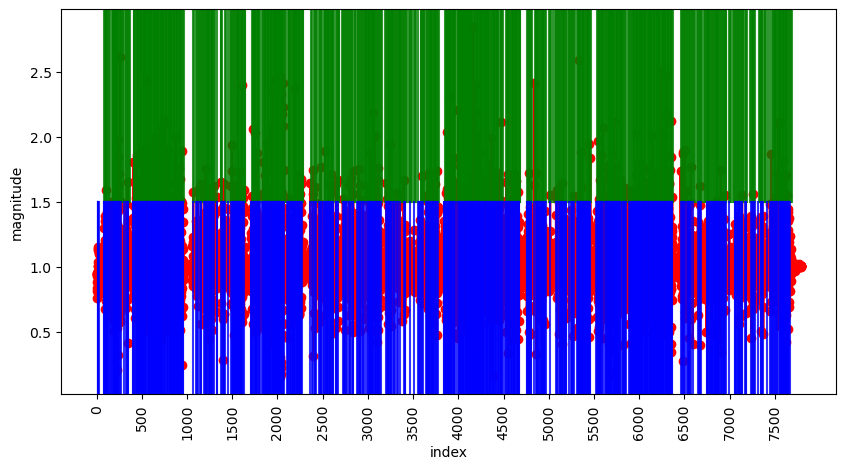

In [6]:
chart(getSteps(file_pairs[16]))

In [30]:
differences = []
i = 0
for pair in file_pairs:
    (calculated1, expected1, _) = getSteps(pair)
    differences.append(len(expected1) - len(calculated1))
    print(i, len(expected1), len(calculated1), pair[0])
    i += 1
print(differences) 

0 198 213 Data\P001\Irregular\P001_Irregular.txt
1 936 993 Data\P001\Regular\P001_Regular.txt
2 702 607 Data\P001\SemiRegular\P001_Semiregular.txt
3 216 288 Data\P002\Irregular\P002_Irregular.txt
4 1223 1147 Data\P002\Regular\P002_Regular.txt
5 646 521 Data\P002\SemiRegular\P002_Semiregular.txt
6 223 247 Data\P003\Irregular\P003_Irregular.txt
7 1052 1063 Data\P003\Regular\P003_Regular.txt
8 715 678 Data\P003\SemiRegular\P003_Semiregular.txt
9 227 241 Data\P004\Irregular\P004_Irregular.txt
10 1100 1231 Data\P004\Regular\P004_Regular.txt
11 613 557 Data\P004\SemiRegular\P004_Semiregular.txt
12 216 291 Data\P005\Irregular\P005_Irregular.txt
13 1043 1197 Data\P005\Regular\P005_Regular.txt
14 667 783 Data\P005\SemiRegular\P005_Semiregular.txt
15 194 235 Data\P006\Irregular\P006_Irregular.txt
16 913 910 Data\P006\Regular\P006_Regular.txt
17 700 718 Data\P006\SemiRegular\P006_Semiregular.txt
18 222 393 Data\P007\Irregular\P007_Irregular.txt
19 1228 1373 Data\P007\Regular\P007_Regular.txt
20 7

In [31]:
%matplotlib qt
chart(getSteps(file_pairs[76]))

In [ ]:
#TODO: new datasets
#TODO: new filter
#TODO   